In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astroquery.ipac.ned import Ned
ned = Ned()

In [4]:
from inspect import getfullargspec

In [5]:
getfullargspec(ned.get_images)

FullArgSpec(args=['self', 'object_name'], varargs=None, varkw=None, defaults=None, kwonlyargs=['get_query_payload', 'show_progress'], kwonlydefaults={'get_query_payload': False, 'show_progress': True}, annotations={})

In [6]:
image = ned.get_images("MCG -01-35-002")

In [7]:
image = image[0][0]

In [8]:
image

In [9]:
plt.style.use(astropy_mpl_style)

In [10]:
image_data = image.data

In [11]:
image_data.shape

(141, 141)

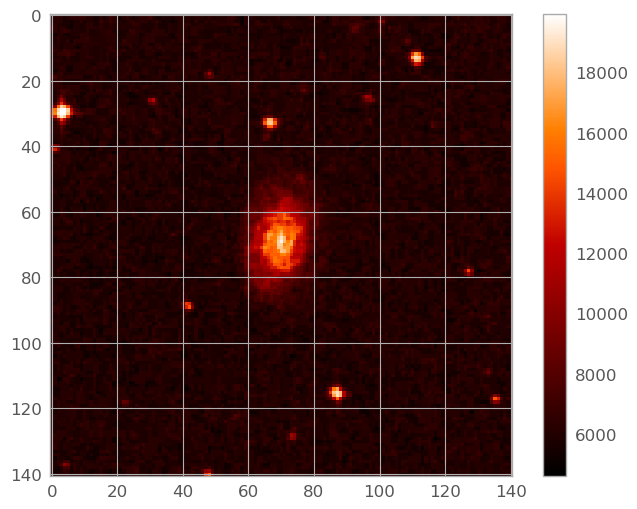

In [12]:
plt.imshow(image_data)
plt.colorbar()

In [13]:
type(image_data)

numpy.ndarray

In [14]:
def get_image_data(object_name: str, ned: Ned) -> np.ndarray:
    return ned.get_images(object_name)[0][0].data

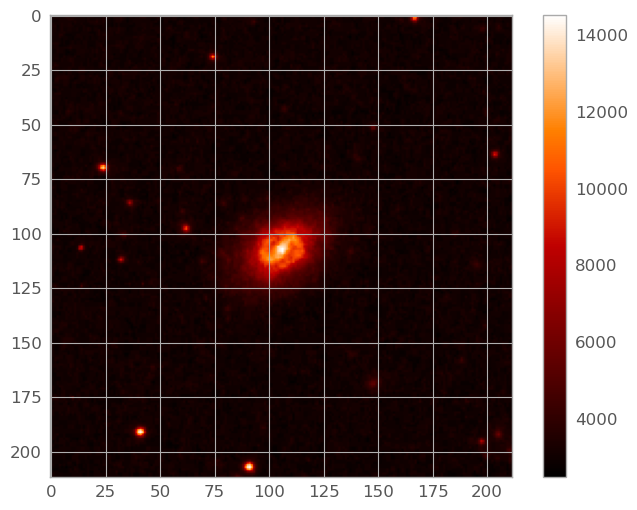

In [66]:
plt.imshow(get_image_data("NGC 5240", ned))
plt.colorbar()

In [16]:
ned.get_table("NGC 5240")

No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,Upper limit of Flux Density,Lower limit of Flux Density,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
,,,,,Hz,Jy,,,,,,,,,,,,,,
int32,object,float64,object,object,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object
1,FUV (GALEX) AB,16.08,+/-0.01,mag,1960000000000000.0,0.00134,1.24e-05,1.24e-05,--,--,+/-1.24E-05,Jy,2018ApJS..234...18B,1 sigma,1530 A,Broad-band measurement,203.979981 +35.588220 (J2000),Total flux,Asymptotic magnitude,From new raw data
2,FUV (GALEX) AB,16.2126,+/-0.0363318,mag,1950000000000000.0,0.00119,3.98e-05,3.98e-05,--,--,+/-3.98E-05,Jy,2012GASC..C...0000S,uncertainty,1538.6 A,Broad-band measurement,203.98017277322 35.588598354246 (J2000),Flux integrated from map,Kron flux in elliptical aperture,From new raw data
3,FUV (GALEX) AB,21.0233,+/-0.457096,mag,1950000000000000.0,1.41e-05,5.96e-06,5.96e-06,--,--,+/-5.96E-06,Jy,2012GASC..C...0000S,uncertainty,1538.6 A,Broad-band measurement,203.98017277322 35.588598354246 (J2000),Flux in fixed aperture,Flux in 7.5 arcsec diameter aperture,From new raw data
4,NUV (GALEX) AB,15.65,+/-0.01,mag,1300000000000000.0,0.002,1.84e-05,1.84e-05,--,--,+/-1.84E-05,Jy,2018ApJS..234...18B,1 sigma,2310 A,Broad-band measurement,203.979981 +35.588220 (J2000),Total flux,Asymptotic magnitude,From new raw data
5,NUV (GALEX) AB,15.7927,+/-0.0184442,mag,1290000000000000.0,0.00175,2.97e-05,2.97e-05,--,--,+/-2.97E-05,Jy,2012GASC..C...0000S,uncertainty,2315.7 A,Broad-band measurement,203.98017277322 35.588598354246 (J2000),Flux integrated from map,Kron flux in elliptical aperture,From new raw data
6,NUV (GALEX) AB,20.8083,+/-0.193815,mag,1290000000000000.0,1.72e-05,3.08e-06,3.08e-06,--,--,+/-3.08E-06,Jy,2012GASC..C...0000S,uncertainty,2315.7 A,Broad-band measurement,203.98017277322 35.588598354246 (J2000),Flux in fixed aperture,Flux in 7.5 arcsec diameter aperture,From new raw data
7,u (SDSS PSF) AB,19.95,+/-0.038,asinh mag,836000000000000.0,3.94e-05,1.38e-06,1.38e-06,--,--,+/-1.38E-06,Jy,2007SDSS6.C...0000:,based on count statistics only,3585 A,Broad-band measurement,203.9799872256 35.5882570215 (J2000),Modelled datum,SDSS flags: CHILD - object is part of a blended parent object; COSMIC_RAY - contains a cosmic ray pixel; BAD_RADIAL - some low S/N radial points; INTERP - object contains interpolated-over pixels; BINNED1 - detected at >=5 sigma in original imaging frame; BINNED_CENTER - image was binned while centroiding; BRIGHTEST_GALAXY_CHILD - brightest child among one parent's children;,From new raw data
8,u (SDSS CModel) AB,14.989,,asinh mag,836000000000000.0,0.00381,--,--,--,--,,Jy,2007SDSS6.C...0000:,no uncertainty reported,3585 A,Broad-band measurement,203.9799872256 35.5882570215 (J2000),Modelled datum,SDSS flags: CHILD - object is part of a blended parent object; COSMIC_RAY - contains a cosmic ray pixel; BAD_RADIAL - some low S/N radial points; INTERP - object contains interpolated-over pixels; BINNED1 - detected at >=5 sigma in original imaging frame; BINNED_CENTER - image was binned while centroiding; BRIGHTEST_GALAXY_CHILD - brightest child among one parent's children;,From new raw data


In [17]:
from astroquery.ipac.ned import Conf
conf = Conf()

In [18]:
[*conf.keys()]

['server',
 'timeout',
 'hubble_constant',
 'correct_redshift',
 'output_coordinate_frame',
 'output_equinox',
 'sort_output_by']

In [19]:
[*conf.values()]

[<ConfigItem: name='server' value='https://ned.ipac.caltech.edu/cgi-bin/' at 0x7f76e0bf44d0>,
 <ConfigItem: name='timeout' value=60 at 0x7f76e0bf46d0>,
 <ConfigItem: name='hubble_constant' value='73' at 0x7f76e0bf4790>,
 <ConfigItem: name='correct_redshift' value='1' at 0x7f76e0bf4810>,
 <ConfigItem: name='output_coordinate_frame' value='Equatorial' at 0x7f76e0bf4a50>,
 <ConfigItem: name='output_equinox' value='J2000.0' at 0x7f76e0bf4e10>,
 <ConfigItem: name='sort_output_by' value='RA or Longitude' at 0x7f76e0bf5010>]

In [20]:
ned.query_object("m31")

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,str30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,MESSIER 031,10.68479,41.26906,G,-297.0,-0.000991,SUN,4.36,--,5163,23,176,63,40,13,2


In [21]:
spectra = ned.get_spectra("m31")

In [61]:
name = "ESO 475- G 003"
ned.get_image_list(name)

['https://ned.ipac.caltech.edu/dss1A2/AQ/ESO_475-_G_003:I:IIIaJ:dss1.fits.gz',
 'https://ned.ipac.caltech.edu/img/1989ESOLV.C...0000L/ESOLV3R/ESO-LV_4750030:I:R:lv1989.fits.gz',
 'https://ned.ipac.caltech.edu/img/1989ESOLV.C...0000L/ESOLV3B/ESO-LV_4750030:I:B:lv1989.fits.gz']

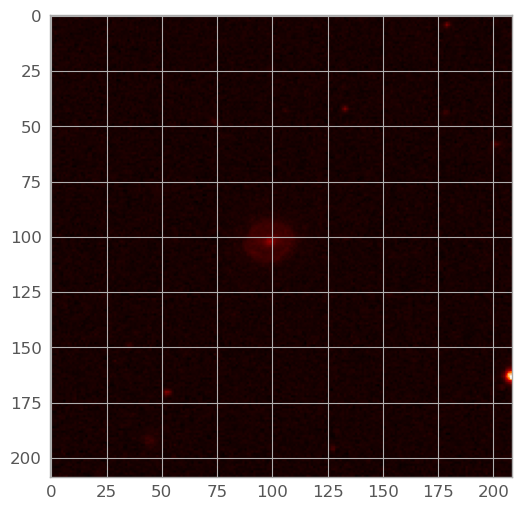

In [64]:
plt.imshow(ned.get_images(name)[2][0].data)